In [55]:
# Import libraries
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [56]:
# Load the iris dataset
iris = load_iris()

In [57]:
# Convert to DataFrame for better understanding
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

In [58]:
# Display first few rows
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [59]:
# Check dataset information
print("\nDataset Information:")
print(iris_df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


#Data Visualization

In [60]:
# Correlation matrix
correlation_matrix = iris_df.drop('species', axis=1).corr()

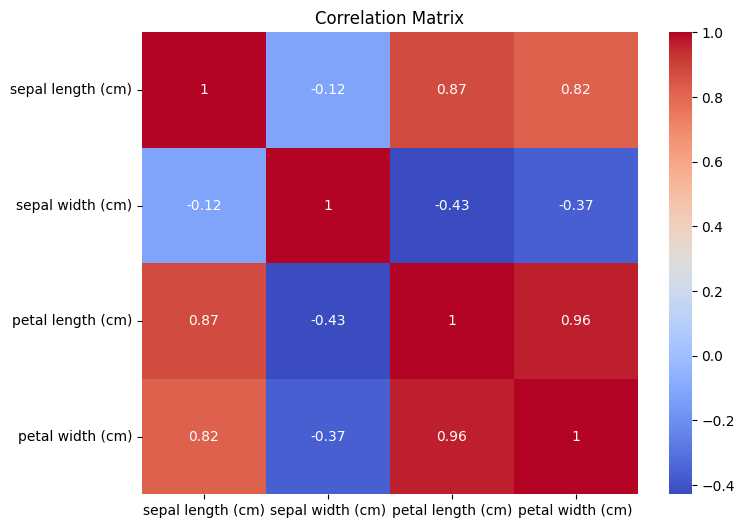

In [61]:
# Plot correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [62]:
# Statistical summary
print("\nStatistical Summary:")
print(iris_df.describe())


Statistical Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [63]:
# Import libraries for model training
from sklearn.model_selection import train_test_split

In [64]:
# Split the data into training and test sets
X = iris_df.drop(['species'], axis=1)
y = iris_df['species']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#RandomForestClassifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
# Train a Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
# Make predictions
y_pred = RF_model.predict(X_test)

In [69]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy * 100:.2f}%")


Accuracy of the Random Forest model: 100.00%


In [70]:
# Perform cross-validation
rf_cv_scores = cross_val_score(RF_model, X, y, cv=5)  # 5-fold cross-validation

# Print average accuracy from cross-validation
print(f"Average accuracy of RandomForestClassifier from cross-validation: {rf_cv_scores.mean() * 100:.2f}%")


Average accuracy of RandomForestClassifier from cross-validation: 96.67%


#SVC

In [71]:
from sklearn.svm import SVC

In [72]:
# Create an SVM model
svm_model = SVC(kernel='linear', random_state=42)

In [73]:
# Train and test the SVM model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [74]:
# Make predictions
svm_y_pred = svm_model.predict(X_test)

In [75]:
# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Accuracy of the SVM model: {svm_accuracy * 100:.2f}%")


Accuracy of the SVM model: 100.00%


In [76]:
# Cross-validation
svm_cv_scores = cross_val_score(svm_model, X, y, cv=5)

# Print average accuracy from cross-validation
print(f"Average accuracy of SVM from cross-validation: {svm_cv_scores.mean() * 100:.2f}%")


Average accuracy of SVM from cross-validation: 98.00%


#LogisticRegression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
# Create a Logistic Regression model
log_reg_model = LogisticRegression(max_iter=200, random_state=42)

In [79]:
# Train the Logistic Regression model
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [80]:
# Make predictions
log_reg_y_pred = log_reg_model.predict(X_test)

In [81]:
# Evaluate the model
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
print(f"Accuracy of the Logistic Regression model: {log_reg_accuracy * 100:.2f}%")

Accuracy of the Logistic Regression model: 100.00%


In [82]:
# Perform cross-validation for Logistic Regression
log_reg_cv_scores = cross_val_score(log_reg_model, X, y, cv=5)

In [83]:
# Print average accuracy from cross-validation
print(f"Average accuracy of Logistic Regression from cross-validation: {log_reg_cv_scores.mean() * 100:.2f}%")

Average accuracy of Logistic Regression from cross-validation: 97.33%


#Comparison of Cross-validation Accuracy for Different Models

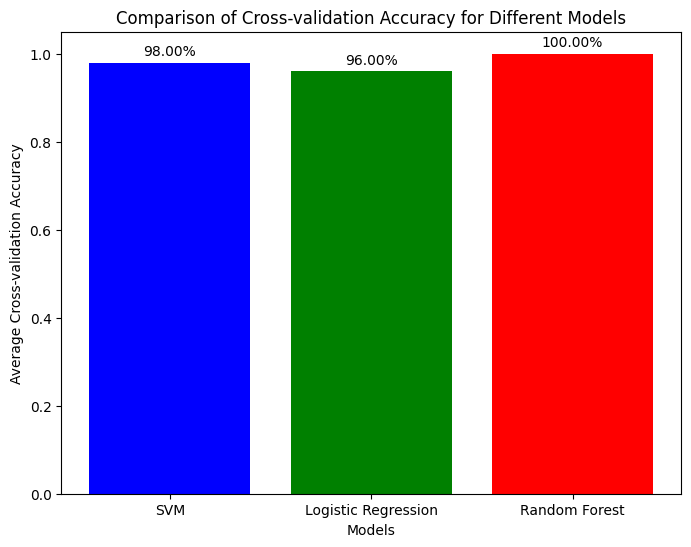

In [84]:
# Assuming cv_scores contains the cross-validation accuracy for different models
models = ['SVM', 'Logistic Regression', 'Random Forest']
cv_scores = [0.98, 0.96, 1.00]  # Replace with actual cross-validation scores

# Create a bar chart with accuracy values on top of the bars
plt.figure(figsize=(8,6))
bars = plt.bar(models, cv_scores, color=['blue', 'green', 'red'])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Average Cross-validation Accuracy')
plt.title('Comparison of Cross-validation Accuracy for Different Models')

# Add accuracy labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval*100:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()


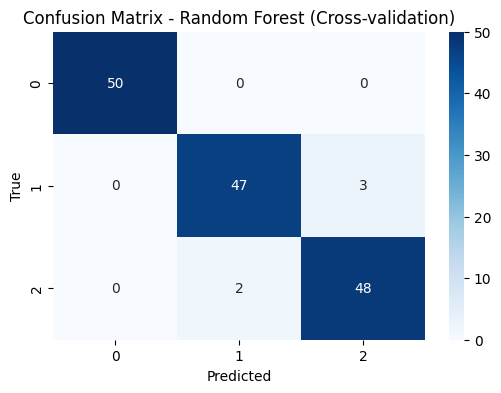

In [85]:
# Random Forest Model
rf_predictions = cross_val_predict(RF_model, X, y, cv=5)
rf_conf_matrix = confusion_matrix(y, rf_predictions)
plt.figure(figsize=(6,4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Random Forest (Cross-validation)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


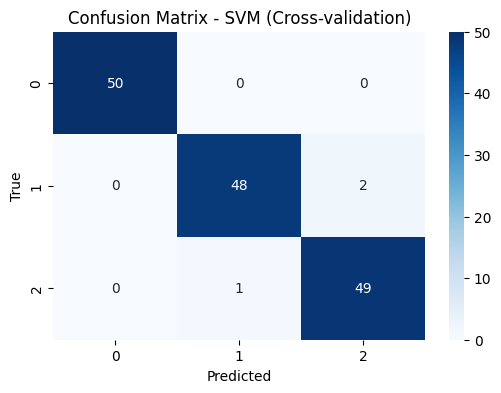

In [86]:
# SVM Model
svm_predictions = cross_val_predict(svm_model, X, y, cv=5)
svm_conf_matrix = confusion_matrix(y, svm_predictions)
plt.figure(figsize=(6,4))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - SVM (Cross-validation)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

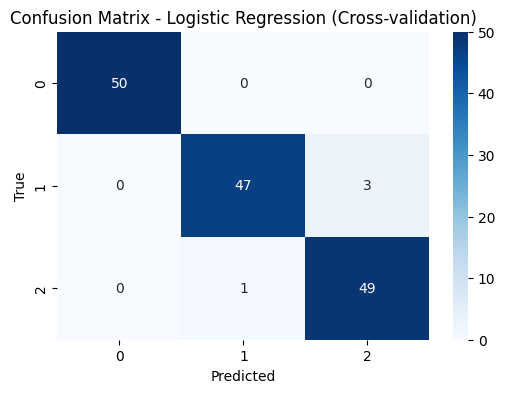

In [87]:
# Logistic Regression Model
log_reg_predictions = cross_val_predict(log_reg_model, X, y, cv=5)
log_reg_conf_matrix = confusion_matrix(y, log_reg_predictions)
plt.figure(figsize=(6,4))
sns.heatmap(log_reg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Logistic Regression (Cross-validation)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#Test Model

In [88]:
def predict_species(model):
    # Taking input from the user
    print("Enter the flower's features to predict the species:")

    sepal_length = float(input("Sepal Length (cm): "))
    sepal_width = float(input("Sepal Width (cm): "))
    petal_length = float(input("Petal Length (cm): "))
    petal_width = float(input("Petal Width (cm): "))

    # Create a feature array for the given input values
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Predict the species using the trained model
    predicted_species = model.predict(input_data)

    # Mapping the numerical species values to their respective names
    species_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

    # Output the predicted species
    print(f"\nThe predicted species is: {species_mapping[predicted_species[0]]}")

# Example usage:
# Replace `svm_model` with your trained model (RandomForest or Logistic Regression)

# Call the function to make a prediction
predict_species(svm_model)  # svm_model


Enter the flower's features to predict the species:
Sepal Length (cm): 5
Sepal Width (cm): 3.5
Petal Length (cm): 1.3
Petal Width (cm): 0.3

The predicted species is: Setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [89]:
predict_species(RF_model)  # RandomForest

Enter the flower's features to predict the species:
Sepal Length (cm): 6.5
Sepal Width (cm): 2.8
Petal Length (cm): 4.6
Petal Width (cm): 1.5

The predicted species is: Versicolor


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [90]:
predict_species(log_reg_model)  # Logistic Regression

Enter the flower's features to predict the species:
Sepal Length (cm): 6.8
Sepal Width (cm): 3
Petal Length (cm): 5.5
Petal Width (cm): 2.1

The predicted species is: Virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
